# Cat v/s Dog Classification using Convolutional Neural Network (CNNs)

## Introduction

In the realm of artificial intelligence and machine learning, object recognition stands as a critical challenge that elucidates the remarkable capabilities of modern computational models. One particularly interesting and ubiquitous problem within object recognition is the classification of cats versus dogs.
This classification task not only underpins various practical applications, ranging from pet monitoring systems to content filtering on social platforms, but also serves as a classic case study for the effectiveness of deep learning techniques — specifically, Convolutional Neural Networks (CNNs).
CNNs have gained significant attention due to their unparalleled success in image recognition tasks. By leveraging large datasets of labelled images, these networks can learn intricate patterns and differentiate between complex visual categories. 
In the case of cat versus dog classification, CNNs analyze image data through multiple layers of processing, extracting features that make the distinction between feline and canine subjects both subtle and robust.

## Convolutional Neural Network

Convolutional Neural Networks have substantially advanced the task of image classification, particularly in differentiating between visually similar classes such as cats and dogs. Their multilayered architecture is adept at automatically extracting and learning features from raw images, which is key to their success. In a detailed cat versus dog classification challenge, after the input layer that holds the raw pixel data of the image, the network architecture typically unfolds into several crucial layers: 

### A. Convolutional Layers

These are the core building blocks of a CNN. They consist of a set of learnable filters that slide over the input image to produce feature maps. As these filters convolve around the image, they learn to detect edges, shapes, and various texture patterns that can distinguish between cats and dogs. Multiple sets of filters are often used to capture a wide array of features. 

### B. Activation Functions

Each convolution operation is usually followed by an activation function like the Rectified Linear Unit and Sigmoid. The purpose of ReLU is to introduce non-linearity into the network, enabling it to learn complex patterns.

### C. Batch Normalization

Positioned typically after the convolutional layers or activation functions, batch normalization is a technique used to improve the training of deep neural networks. It normalizes the output of the previous layer by adjusting and scaling the activations. This stabilizes the learning process and significantly reduces the number of training epochs required to train deep networks. Additionally, batch normalization helps mitigate the problem of internal covariate shift, where the distribution of inputs to a specific layer changes as the parameters of the previous layers change during training

### D. Pooling Layers

These layers downsample the spatial dimensions (width, height) of the input volume for a given feature map, reducing the number of parameters and computation in the network, thus controlling overfitting. Max pooling and average pooling are common pooling functions that aggregate the values from a cluster of neurons into a single neuron in the next layer. 

### E. Fully Connected / Dense Layers 

After several convolutional and pooling layers, the high level reasoning in the neural network is performed via fully connected layers, where every input is connected to every output. In a cat vs dog classifier, the fully connected layers act as a classifier on top of the features previously extracted by the convolutional layers and flattened.

### F. Output Layer

The final layer in a CNN is typically a SoftMax/Sigmoid activation function that converts the output into a probability distribution for each class, cats and dogs, in this case.

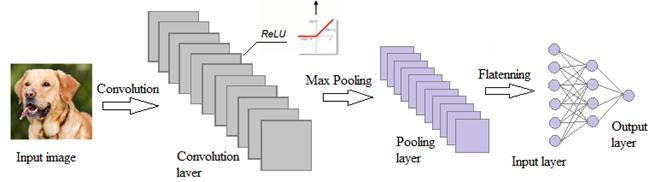

# Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import keras
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing

### Sample

I have taken some sample pictures from the dataset to check how the images look like and what all preprocessing steps needs to be taken care of.

In [2]:
#Using openCV's imread() function to read the images

img1=cv.imread('d1.jpg')
img2=cv.imread('d2.jpg')
img3=cv.imread('c1.jpg')
img4=cv.imread('c2.jpg')

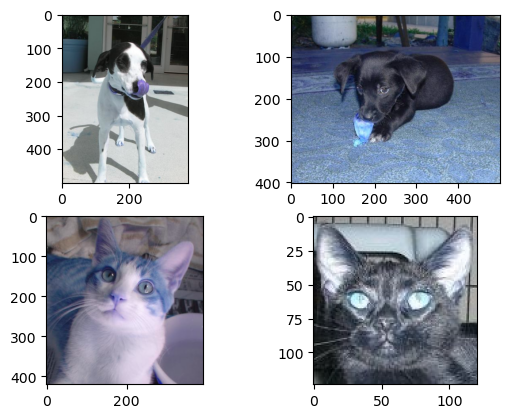

In [3]:
#plotting the images using subplots
f,ax=plt.subplots(2,2)
ax[0,0].imshow(img1)
ax[0,1].imshow(img2)
ax[1,0].imshow(img3)
ax[1,1].imshow(img4)

In [4]:
#Checking the shape of the images
img1.shape,img2.shape,img3.shape,img4.shape

((500, 375, 3), (401, 500, 3), (420, 392, 3), (124, 121, 3))

In [5]:
#To train the model one factor needs to be taken care of is the image size should be same, 
#so using openCV's .resize() we will resize the images.
img1=cv.resize(img1,(256,256))
img2=cv.resize(img2,(256,256))
img3=cv.resize(img3,(256,256))
img4=cv.resize(img4,(256,256))

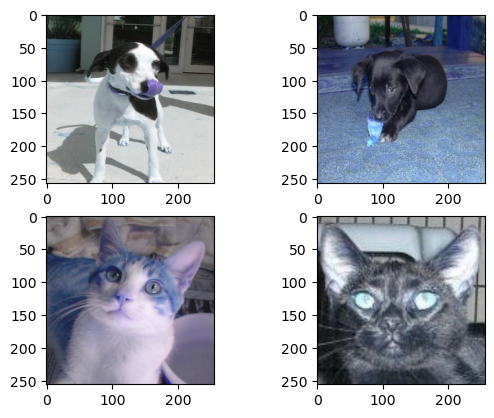

In [6]:
#Plotting images after resizing into same shape
f,ax=plt.subplots(2,2)
ax[0,0].imshow(img1)
ax[0,1].imshow(img2)
ax[1,0].imshow(img3)
ax[1,1].imshow(img4)

# Importing the dataset

we have utilized the 'keras.utils.image_dataset_from_directory' utility, which is an efficient and straightforward function to import image data from a local directory structure into a Jupyter Notebook environment for processing. 
The utility is invoked with specific arguments tailored to our dataset's characteristics: 

1.	`labels='inferred'`: This argument indicates that the labels are derived from the directory structure, thereby avoiding the need for manual labelling.

2.	`label_mode='int'`: It simplifies the subsequent steps in the pipeline by marking cats as '0' and dogs as '1', providing a binary classification framework that aligns with the sigmoid output of the CNN. 

3.	`batch_size=32`: This defines the number of samples that will be propagated through the network in one forward/backward pass, striking a balance between computational efficiency and the capacity to learn complex features.

4.	`image_size=`: Resizes images to a consistent shape, which is required since CNNs necessitate uniform input dimensions. The chosen size retains sufficient image detail for feature extraction while avoiding excessive computational load


In [7]:
train_df = keras.utils.image_dataset_from_directory(
    directory = 'pet/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_df = keras.utils.image_dataset_from_directory(
    directory = 'pet/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# Normalization

Upon importing these images as tensors, an essential preprocessing step is to normalize the pixel values originally ranging from 0 to 255 to a scale of 0 to 1. 
A dedicated normalization function is employed to transform the data, enhancing the capability of the model to learn from the data efficiently, as normalized data typically results in faster convergence during training. 
This preprocessing pipeline not only streamlines the data import process but also establishes a foundation for effective feature learning, which is crucial for the successful classification of images by the CNN

In [8]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_df = train_df.map(process)
test_df = test_df.map(process)

# Model Architecture

The Convolutional Neural Network model for cat vs dog classification was constructed within a structured framework provided by Keras. The architecture was developed sequentially, allowing for an intuitive stacking of layers and clear data flow. 
To begin, we initiated a Sequential container from Keras, which enables us to add layers in a step-by-step manner. The following outlines the architecture and components of the CNN model: 

A. First Layer 

1) Convolutional Layer: The model's initial layer utilized 32 filters, each with a kernel size of 3x3, adept at capturing basic patterns and features from the input images. The ReLU activation function was applied to introduce non linearity, enabling the detection of complex patterns.

 2) Batch Normalization: Immediately following the first convolutional layer, batch normalization was implemented. This step normalizes the activations from the previous layer, stabilizing the neural network, improving training speed, and reducing sensitivity to network initialization. 
 
3) Pooling Layer: After batch normalization, a pooling layer with a 2x2 filter was added to perform max pooling with a stride of 2. This operation reduces the spatial dimensions of the output from the previous layer, thereby reducing computation and controlling overfitting.


 B. Second Layer 
 
1) Convolutional Layer: Increasing the complexity, the model incorporated a second convolutional layer with 64 filters. This layer allows the network to begin recognizing more complex features such as edges and corners.

2) Batch Normalization and Pooling: Similar to the first block, batch normalization and a pooling layer followed the second convolutional layer to further refine feature maps and reduce dimensions 


C. Third Layer 

Continuing to deepen the feature extraction, a third convolutional layer was addedwith 128 filters along with subsequent batch normalization and another pooling sequence. 


D. Output Layer The three-dimensional output was then flattened to a single vector to transition from feature extraction to classification. 

The flattened output was passed through fully connected layers for the final classification decision. The first dense layer comprised 128 nodes with a ReLU activation, followed by a dropout layer set to 0.1 to prevent overfitting. A subsequent dense layer included 64 nodes, again paired with a ReLU activation and dropout. 

The end of the network consisted of a single neuron with a sigmoid activation function, giving a binary output that classifies the image as either a cat or a dog.


# Creating model without Batch Normalization

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model

For the compilation of the model, the Adam optimizer was selected. Adam is a popular choice for training deep learning models due to its ability to adjust the learning rate during training, which can lead to faster convergence. The loss function chosen was 'binary_crossentropy', which is well suited for binary classification problems. The primary metric for model performance was 'accuracy'.

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Fitting the model

When it came time to fitting the model, training proceeded for 10 epochs. An epoch is a full iteration over the entire dataset, and the choice of 10 suggests a balance between obtaining sufficient training to learn the classification task and avoiding excessive training time.

In [12]:
train_model = model.fit(train_df,epochs=10,validation_data=test_df)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 393s 626ms/step - accuracy: 0.5796 - loss: 0.6845 - val_accuracy: 0.7246 - val_loss: 0.5607
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 387s 620ms/step - accuracy: 0.7360 - loss: 0.5193 - val_accuracy: 0.7794 - val_loss: 0.4646
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 387s 619ms/step - accuracy: 0.8096 - loss: 0.4108 - val_accuracy: 0.7754 - val_loss: 0.4676
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 389s 622ms/step - accuracy: 0.8688 - loss: 0.2950 - val_accuracy: 0.7764 - val_loss: 0.5820
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 388s 620ms/step - accuracy: 0.9373 - loss: 0.1633 - val_accuracy: 0.7818 - val_loss: 0.6960
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 388s 620ms/step - accuracy: 0.9654 - loss: 0.0975 - val_accuracy: 0.7808 - val_loss: 0.9466
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 388s 621ms/step - accuracy: 0.9776 - loss: 0.0597 - val_accuracy: 0.7782 - val_loss: 1.1165
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 389s 621ms/step - accuracy: 0.9832 -

## Plotting the accuracy and loss graph for 10 epochs

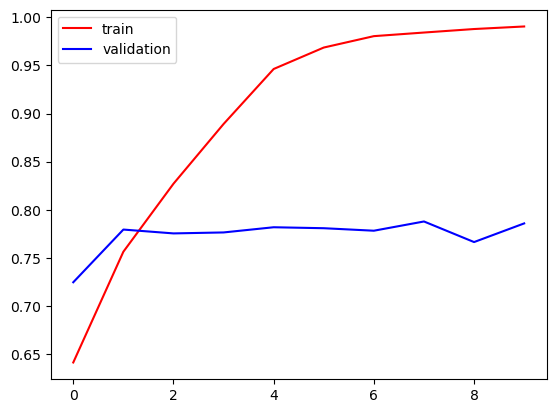

In [13]:
plt.plot(train_model.history['accuracy'],color='red',label='train')
plt.plot(train_model.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

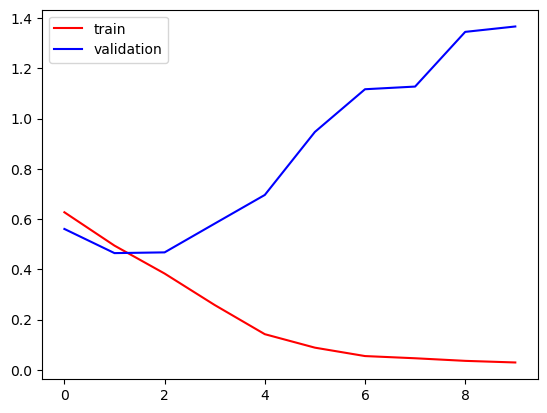

In [14]:
plt.plot(train_model.history['loss'],color='red',label='train')
plt.plot(train_model.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Testing the model with unseen data downloaded from internet

In [15]:
c_test1=cv.imread('test1.jpg')

In [16]:
c_test1.shape

(360, 540, 3)

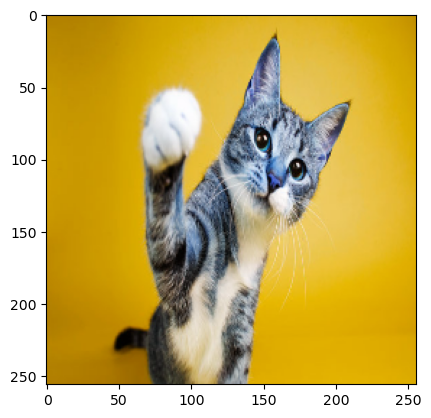

In [17]:
c_test1=cv.resize(c_test1,(256,256))
c_test1_img=c_test1.reshape((1,256,256,3))
plt.imshow(c_test1)

In [18]:
model.predict(c_test1_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[0.]], dtype=float32)

In [19]:
d_test1=cv.imread('d_test1.jpeg')

In [20]:
d_test1.shape

(168, 300, 3)

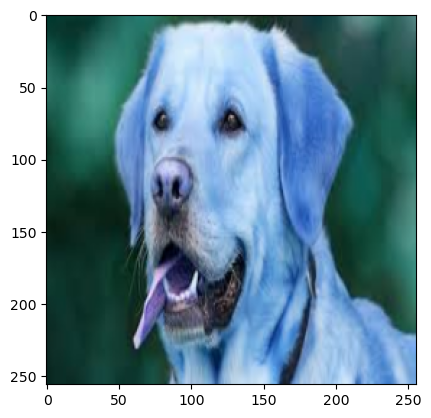

In [21]:
d_test1=cv.resize(d_test1,(256,256))
d_test1_img=d_test1.reshape((1,256,256,3))
plt.imshow(d_test1)

In [22]:
model.predict(d_test1_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[1.]], dtype=float32)

# Creating a model with batch normalization

A question might arise that we already made a model and it was predicting accurately then Why is the need to make a model with batch normalization? The answer is when our tensors are multiplied with weights and added with bias the value doesn't remain normalize i.e; the value are real numbers therefore we apply batch normalization to again normalize the values so it reduces our cost function and computational time. It also reduces the varaince between the accuracy and loss function in  each epoch. The result can be seen by comparing both the graphs.

In [23]:
model1 = Sequential()

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))

In [24]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

## Compiling and fitting

In [25]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
t_m = model1.fit(train_df,epochs=10,validation_data=test_df)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 825s 1s/step - accuracy: 0.5575 - loss: 2.6573 - val_accuracy: 0.5810 - val_loss: 0.7834
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.6182 - loss: 0.6696 - val_accuracy: 0.5474 - val_loss: 0.6922
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.6794 - loss: 0.6097 - val_accuracy: 0.6124 - val_loss: 0.6769
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 836s 1s/step - accuracy: 0.7094 - loss: 0.5731 - val_accuracy: 0.7218 - val_loss: 0.5614
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 832s 1s/step - accuracy: 0.7464 - loss: 0.5235 - val_accuracy: 0.7516 - val_loss: 0.5258
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 832s 1s/step - accuracy: 0.7700 - loss: 0.4960 - val_accuracy: 0.6814 - val_loss: 0.6497
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 833s 1s/step - accuracy: 0.7810 - loss: 0.4864 - val_accuracy: 0.7682 - val_loss: 0.5129
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 833s 1s/step - accuracy: 0.7939 - loss: 0.4770 - val_accu

## Plotting the accuracy and loss graph for each epoch

we can notice that the variance between the training and validation accuracy is less as compared to model without batch normalization

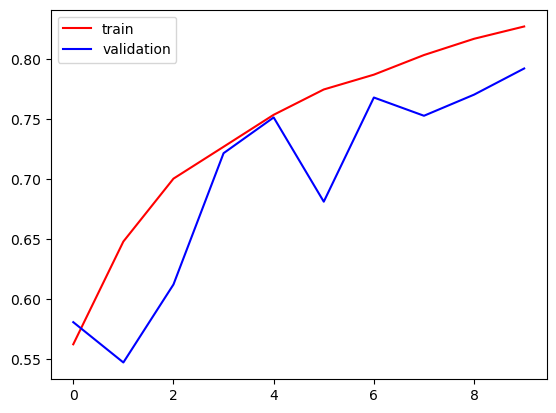

In [27]:
plt.plot(t_m.history['accuracy'],color='red',label='train')
plt.plot(t_m.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

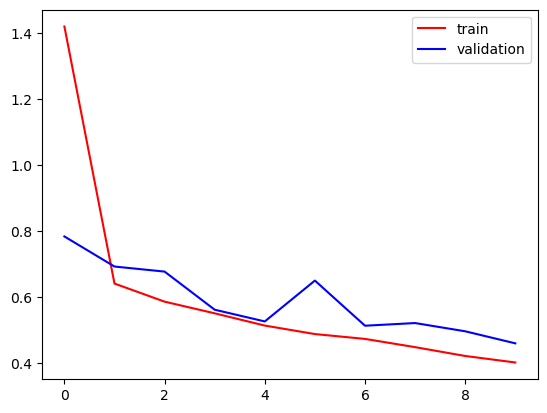

In [28]:
plt.plot(t_m.history['loss'],color='red',label='train')
plt.plot(t_m.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Testing model with unseen data downloaded from internet

In [62]:
c_test2=cv.imread('test2.jpg')

In [63]:
c_test2.shape

(146, 344, 3)

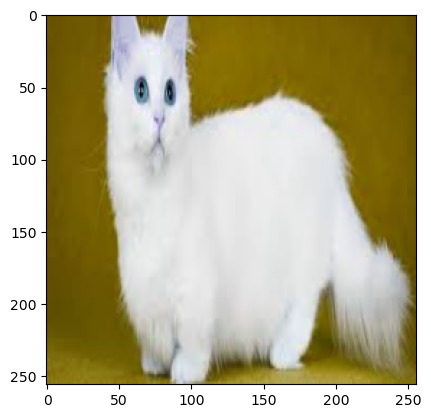

In [64]:
c_test2=cv.resize(c_test2,(256,256))
c_test2_img=c_test2.reshape((1,256,256,3))
plt.imshow(c_test2)

In [65]:
model1.predict(c_test2_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.]], dtype=float32)

In [66]:
d_test2=cv.imread('d_test2.jpeg')

In [67]:
d_test2.shape

(360, 540, 3)

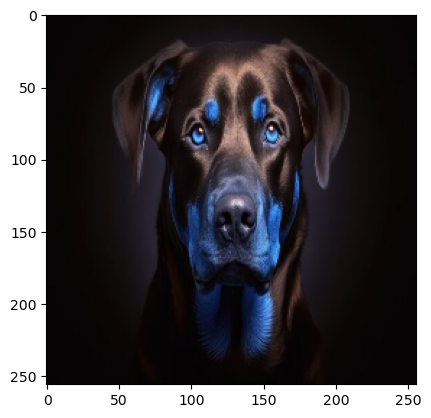

In [68]:
d_test2=cv.resize(d_test2,(256,256))
d_test2_img=d_test2.reshape((1,256,256,3))
plt.imshow(d_test2)

In [69]:
model1.predict(d_test2_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[1.]], dtype=float32)

In [71]:
f_test=cv.imread('ftest.jpg')
f_test.shape

(1004, 1500, 3)

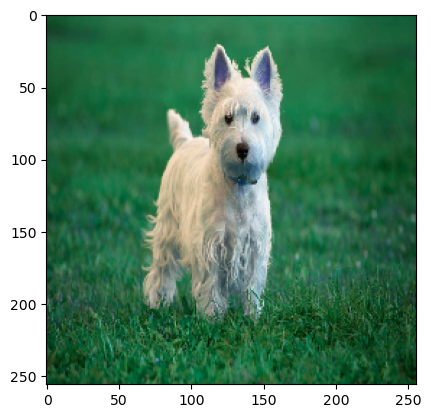

In [72]:
f_test=cv.resize(f_test,(256,256))
f_test_img=f_test.reshape((1,256,256,3))
plt.imshow(f_test)

In [73]:
model1.predict(f_test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[1.]], dtype=float32)